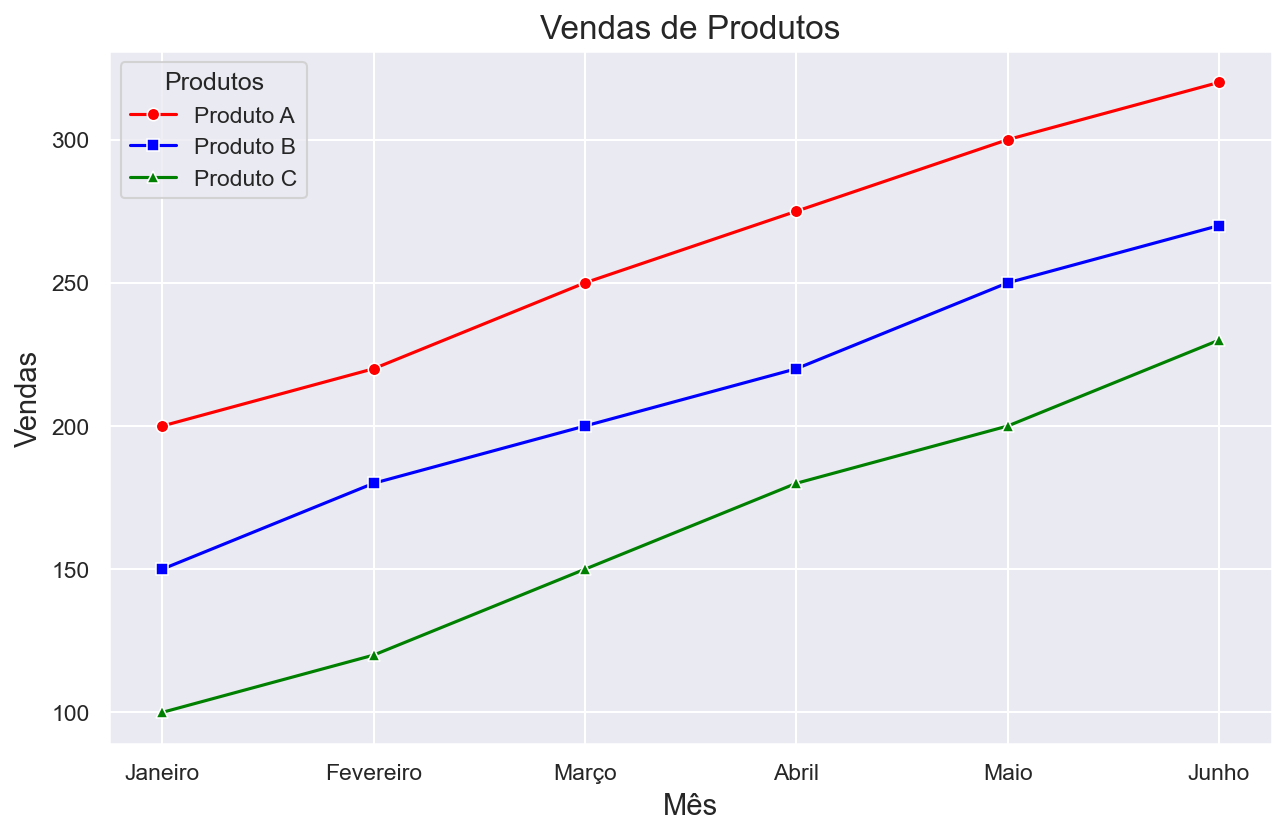

In [56]:
# Tipos de Gráficos: Gráficos de Linha com Múltiplas Linhas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

produtos = pd.read_csv('./produtos.csv')
produtos.head(5)

# Tema, tamanho
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6),dpi=150)
# como plotar múltiplas linhas com o seaborn
sns.lineplot(data=produtos,x='Mes',y='Produto A',label='Produto A',marker='o',color='red')
sns.lineplot(data=produtos,x='Mes',y='Produto B',label='Produto B',marker='s',color='blue')
sns.lineplot(data=produtos,x='Mes',y='Produto C',label='Produto C',marker='^',color='green')

# Legendas
plt.title('Vendas de Produtos',fontsize=16)
plt.xlabel('Mês',fontsize=14)
plt.ylabel('Vendas',fontsize=14)
plt.legend(title='Produtos')
plt.show()

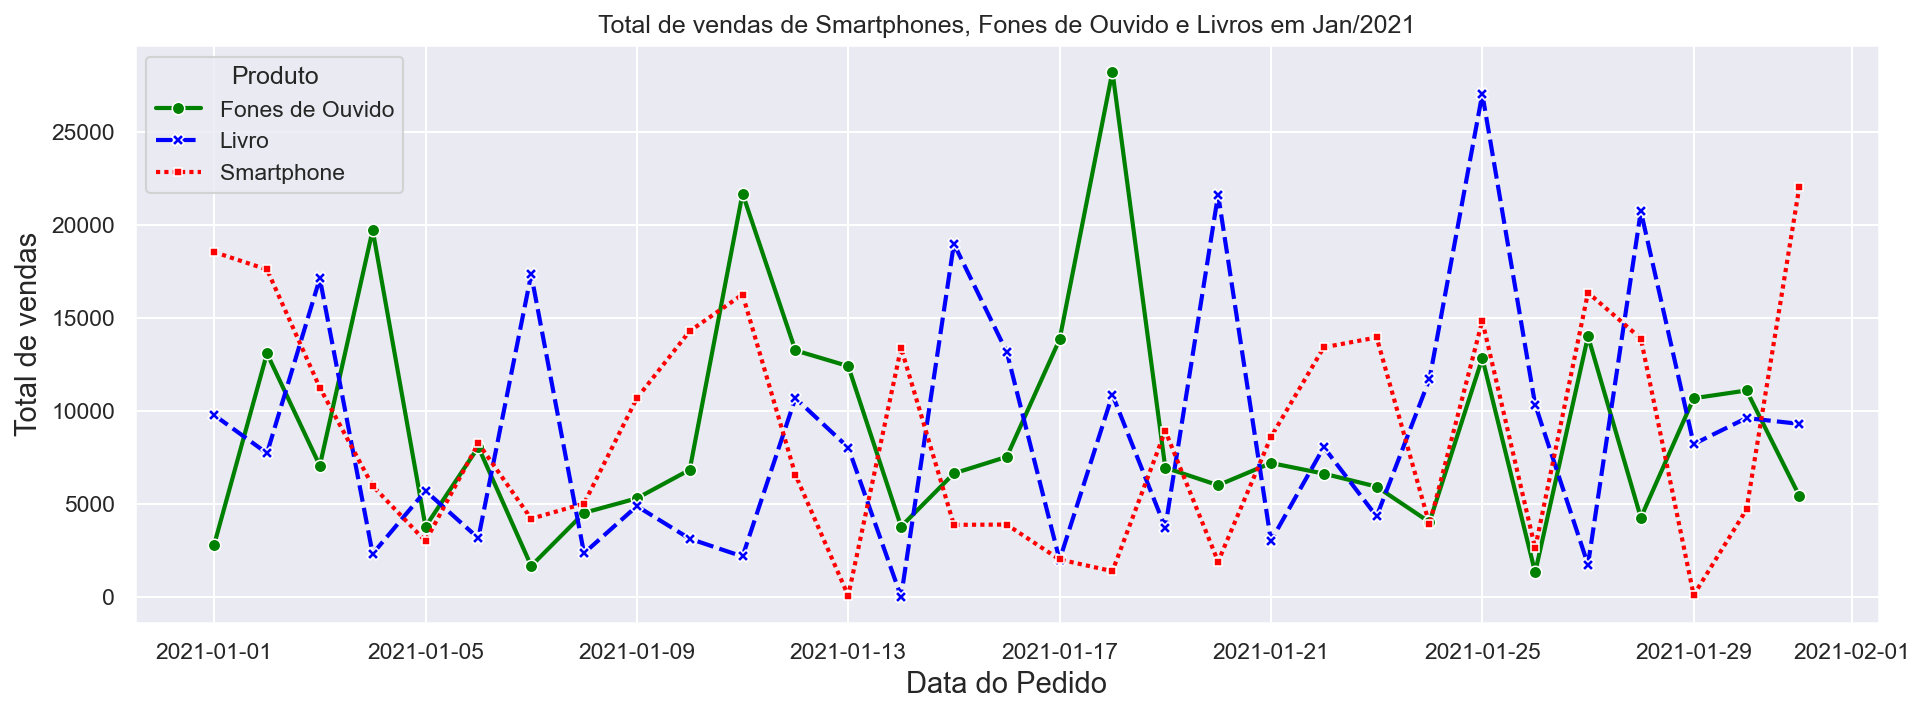

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dados_pedidos = pd.read_csv('./dados_vendas.csv')
# Converter para data, para possibilitar a filtragem por data
dados_pedidos['Data']= pd.to_datetime(dados_pedidos['Data'])
dados_pedidos['Mês'] = dados_pedidos['Data'].dt.month
# todas as vendas que ocorreram no mês 1 de 2021, dos produtos Smartphone, Fones de Ouvido e Livro.
vendas_filtradas = dados_pedidos[(dados_pedidos['Data'].dt.year == 2021) & (dados_pedidos['Data'].dt.month == 1) & (dados_pedidos['Produto'].isin(['Smartphone','Fones de Ouvido','Livro']))]
vendas_filtradas.head(10)

vendas_agrupadas = vendas_filtradas.groupby(['Data','Produto'])['Valor_Venda'].agg(['sum']).rename(columns={'sum':'Total de Vendas'}).reset_index()

plt.figure(figsize=(15,5),dpi=150)
sns.lineplot(x='Data',y='Total de Vendas',data=vendas_agrupadas,hue='Produto',style='Produto',palette=['green','blue','red'],markers=True,dashes=True)
plt.title('Total de vendas de Smartphones, Fones de Ouvido e Livros em Jan/2021',fontsize=16)
plt.xlabel('Data',fontsize=14)
plt.ylabel('Total de Vendas',fontsize=14)
plt.show()